In [1]:
#logistic regression/binnary classification 
#two feature z = w1x1 + w2x2 + b
#probability(y=1|x; w,b) 
#classification
import numpy as np
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1]) 

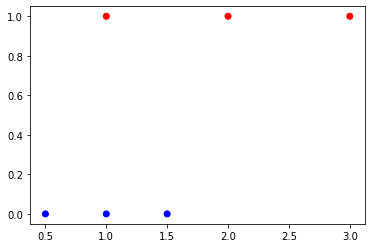

In [2]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots()
ax.scatter(x_train[:,0], y_train , color=['blue','blue' , 'blue' , 'red' , 'red','red'])

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
w = np.array([2.,3.])
b = 1.0
sigmoid (np.dot (x_train[0] , w) + b)

0.998498817743263

In [5]:
# when y is zero -(1 - y) * log(1 - gz)
# when y is one  -y * log(gz)
# simplified equation -y * log(gz) - (1 - y) * log(1 - gz)
def cost_function(x, y, w, b):
    t_count = x.shape[0]
    cost = 0
    for i in range (t_count):
        sig = sigmoid(np.dot(x[i], w) + b)
        loss = -y[i] * np.log(sig) - (1 - y[i]) * np.log(1 - sig)
        cost += loss
    return cost / t_count

In [6]:
cost_function(x_train, y_train, w, b)

3.0013840206452973

In [7]:
def logistic_regression(x, y, w, b):
    m = x.shape[0]
    dw = np.zeros(w.shape[0]) 
    db = 0
    for i in range(m):
        sig = sigmoid(np.dot(x[i], w) + b) - y[i]
        db += sig
        dw += sig * x[i]
    return (dw / m, db / m)   

In [8]:
logistic_regression(x_train, y_train, w, b)

(array([0.49833339, 0.49883943]), 0.49861806546328574)

In [9]:
def train(x, y, w, b, alpha, itr):
    cost_history = []
    for i in range(itr):
        cost_history.append(cost_function(x, y, w, b))
        dw, db = logistic_regression(x, y, w, b)
        w -= alpha * dw
        b -= alpha * db
    return (w , b)

In [10]:
alpha = 0.1
itr = 10000
b = 0.
w = np.array([0. , 0.])
w_final , b_final = train(x_train, y_train, w, b, alpha, itr)
print(f"w_final -> {w_final} b -> {b_final}")

w_final -> [5.28123029 5.07815608] b -> -14.222409982019837


In [11]:
# threshold value 0.5
# any value greate then 0.5 is 1 otherwise 0
predict = sigmoid(np.dot(np.array([2, 1.5]), w_final) + b_final)
predict

0.9812435815035075